# Preliminary Notebook B: ODEs in Diffrax

(c) 2024 Addison Howe. This work is licensed under a [Creative Commons
Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
All code contained herein is licensed under an [MIT
license](https://opensource.org/licenses/MIT).

[Diffrax](https://docs.kidger.site/diffrax/) is a package with numerical differential equation solvers, that is based in JAX. It's authored by Patrick Kidger, who is also involved with other parts of the [JAX ecosystem](https://docs.kidger.site/diffrax/#see-also-other-libraries-in-the-jax-ecosystem).

The example below, based on the [documentation example](https://docs.kidger.site/diffrax/usage/getting-started/), shows a very basic application of Diffrax to numerically solve the ODE
$$\frac{dy(t)}{dt} = -y(t),\;\; y(0)=1$$
over the interval $[0, 3]$


In [1]:
import matplotlib.pyplot as plt
import jax.numpy as jnp

In [2]:
"""
This example is based on the diffrax tutorial:
    https://docs.kidger.site/diffrax/usage/getting-started/
"""

from diffrax import diffeqsolve, Euler, ODETerm

# Specify the vector field as a function of t, y, and args.
vector_field = lambda t, y, args: -y

# Wrap the vector field in the ODETerm, specifying that we're solving an ODE
term = ODETerm(vector_field)

# We'll use basic Euler stepping
solver = Euler()

# Call diffeqsolve, specifying the time interval and initial condition.
sol = diffeqsolve(
    term,       # governing ODE term (essentially the RHS)
    solver,     # method used to solve the ode 
    t0=0,       # initial time
    t1=3,       # final time
    dt0=0.1,    # initial step size (held constant for Euler stepping)
    y0=1,       # initial condition
)

print(sol.ts)  # DeviceArray([3.    ])
print(sol.ys)  # DeviceArray([0.04239115    ])

[3.]
[0.04239115]


### Additional features of `diffeqsolve`

We can use a [`SaveAt`](https://docs.kidger.site/diffrax/api/saveat/) object to return not just the final state at time $t=3$, but at an array of timepoints.

In [3]:
from diffrax import SaveAt

solver = Euler()
saveat = SaveAt(ts=[0., 1., 2., 3.])

sol = diffeqsolve(
    term, solver, t0=0, t1=3, dt0=0.1, y0=1, saveat=saveat
)

print(sol.ts)
print(sol.ys)

[0. 1. 2. 3.]
[1.         0.34867844 0.12157664 0.04239115]


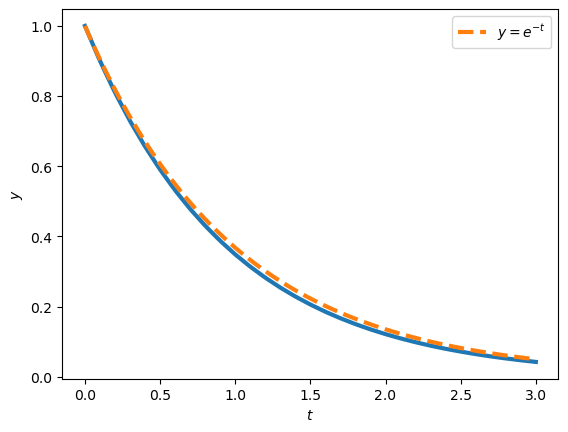

In [4]:
# Save at many timepoints and plot the results. Euler isn't too good...

solver = Euler()
saveat = SaveAt(ts=jnp.linspace(0, 3, 100))

sol = diffeqsolve(
    term, solver, t0=0, t1=3, dt0=0.1, y0=1, saveat=saveat
)

plt.plot(sol.ts, sol.ys, linewidth=3)
plt.plot(sol.ts, jnp.exp(-sol.ts), '--', linewidth=3, label="$y=e^{-t}$")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.legend();

Diffrax also has a bunch of [ODE solvers](https://docs.kidger.site/diffrax/api/solvers/ode_solvers/) ([explicit](https://docs.kidger.site/diffrax/api/solvers/ode_solvers/#explicit-runge-kutta-erk-methods) and [implicit](https://docs.kidger.site/diffrax/api/solvers/ode_solvers/#implicit-runge-kutta-irk-methods)) that we can choose from.
Finally, we can specify how to handle adaptive time stepping via a [`PIDController`](https://docs.kidger.site/diffrax/api/stepsize_controller/).

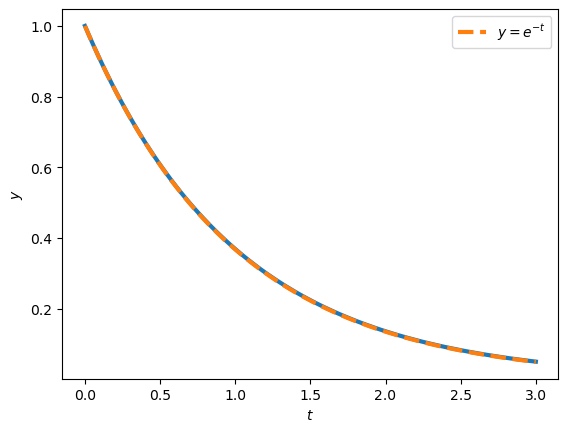

In [5]:
from diffrax import PIDController, ImplicitEuler

# Implicit method with adaptive time stepping
solver = ImplicitEuler()
stepsize_controller = PIDController(rtol=1e-5, atol=1e-5)

saveat = SaveAt(ts=jnp.linspace(0, 3, 100))

sol = diffeqsolve(
    term, solver, t0=0, t1=3, dt0=0.1, y0=1, saveat=saveat,
    stepsize_controller=stepsize_controller
    
)

plt.plot(sol.ts, sol.ys, linewidth=3)
plt.plot(sol.ts, jnp.exp(-sol.ts), '--', linewidth=3, label="$y=e^{-t}$")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.legend();

### Exercise 1

Use Diffrax to solve the ODE
$$\frac{dy(t)}{dt} = y(t)(1-y(t)),\;\; y(0)=\frac{1}{2}$$
over the interval $I=[0, 2]$.
Plot the solution over the interval.

Use the [Dormand-Prince](https://en.wikipedia.org/wiki/Dormand%E2%80%93Prince_method) solver `Dopri5`, a 5th order explicit Runge-Kutta method. Experiment with different initial conditions.

In [6]:
from diffrax import Dopri5

#!-------------------------  TODO: YOUR CODE HERE  -------------------------!#
# Solve the ODE and plot the trajectory.


#!--------------------------------------------------------------------------!#

### Exercise 2

Consider the same ODE as above. 
Use `jax.vmap` to solve the ODE over an array of initial conditions, 
$$y(0)=y_0, \;\;\;\; y_0\in\{0, 0.2, 0.4, \ldots, 2\}$$
and plot the trajectories.

Hint 1: Write a wrapper function `solve` that takes as input the initial condition `y0` and returns the result of `diffeqsolve`, then vectorize that wrapper function.
The returned solution of the vectorized `solve` function should still have attributes `ts` and `ys`, which should now contain 2-dimensional arrays, with one row for each initial condition.

Hint 2: When plotting, you may need to take the transpose of `ts` and `ys`.

In [7]:
from jax import vmap

#!-------------------------  TODO: YOUR CODE HERE  -------------------------!#
# Solve the ODE across an array of initial conditions.


#!--------------------------------------------------------------------------!#

## Conclusion
In this notebook, we learned how to use `diffrax` to numerically solve ODEs, and used JAX's vectorization capabilities to solve for multiple trajectories at once.

In [8]:
%load_ext watermark
%watermark -v -p jax,diffrax,numpy,matplotlib

Python implementation: CPython
Python version       : 3.9.19
IPython version      : 8.18.1

jax       : 0.4.26
diffrax   : 0.5.1
numpy     : 1.26.4
matplotlib: 3.8.4

